In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 
#generate a data set of 20. 
#for simplicity, 10 in the first quadrant, another 10 in the third quadrant 
X1_positive = []
X2_positive = []
X1_negative = []
X2_negative = []

for i in range(3):
    X1_positive.append(random.uniform(0,1))
    X2_positive.append(random.uniform(0,1))
    X1_negative.append(random.uniform(-1,0))
    X2_negative.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
data = data1 + data2

#data1_PLA = [np.array([1,X1_positive[i],X2_positive[i],1]) for i in range(3)]
#data2_PLA = [np.array([1,X1_negative[i],X2_negative[i],-1]) for i in range(3)]
#data_PLA = data1_PLA + data2_PLA


In [15]:
a = random.uniform(-1,1)
print(a)

0.8637743416022994


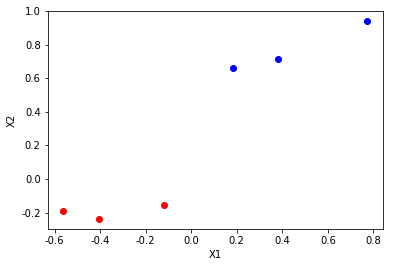

In [3]:
#Part b plotting target function f and hypothesis g of the Problem 1.4 from the HW - 1
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [4]:
from sklearn import svm

In [5]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [6]:
X = np.array(data)[:,0:2]
y = np.array(data)[:,2]

In [7]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
print(clf.coef_[0])
W = clf.coef_[0]
b = clf.intercept_[0]
print("W0 = ", W[0])
print("W1 = ", W[1])
print("b = ", b)

[0.81054034 1.42443989]
W0 =  0.8105403430917396
W1 =  1.4244398890905456
b =  -0.3306774286624228


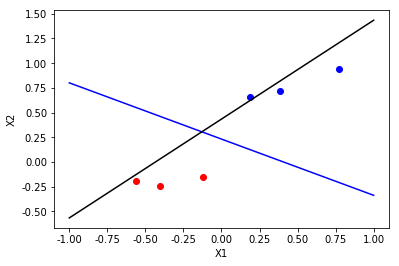

In [9]:
plt.plot(X1_positive, X2_positive, 'bo')
plt.plot(X1_negative, X2_negative, 'ro')
x = np.linspace(-1,1)
plt.plot(x, (-W[0]*x-b)/W[1], color='blue', linestyle='-')
plt.plot(x, x-a, color='black', linestyle='-') #plotting hypothesis
#plt.axis([-1, 1, -1, 1])
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [10]:
def generateRandomThreeDataPoints():
    X1_positive = []
    X2_positive = []
    X1_negative = []
    X2_negative = []
    
    for i in range(3):
        X1_positive.append(random.uniform(0,1))
        X2_positive.append(random.uniform(0,1))
        X1_negative.append(random.uniform(-1,0))
        X2_negative.append(random.uniform(-1,0))

    #label the data
    data1 = [np.array([X1_positive[i],X2_positive[i],1]) for i in range(3)]
    data2 = [np.array([X1_negative[i],X2_negative[i],-1]) for i in range(3)]
    data = data1 + data2
    return data
    

In [11]:
a_random = []
svm_hypothesis = []
a_svm = []

for j in range(1,100001):

    data = generateRandomThreeDataPoints()
    
    X = np.array(data)[:,0:2]
    y = np.array(data)[:,2]
    
    a_random.append(random.uniform(-1,1))
    clf.fit(X,y)
    W = clf.coef_[0]
    b = clf.intercept_[0]
    a_svm.append(-b)
    temp = {
        "w0":W[0],
        "w1":W[1],
        "b":b
    }
    svm_hypothesis.append(temp)

In [72]:
print(a_svm)
print(a_random)

[0.04710507392883301, -0.11564510295387884, 0.2175185008590592, 0.09785157248681536, 0.050156306918679755, -0.22768278083162566, -0.05877095283958179, -0.08148829704618385, -0.18134251614592092, -0.4098839687883004]
[0.610644912572339, -0.13965057352333243, -0.10944313479718626, 0.6834883088382506, 0.909616481695469, 0.06914207334158573, -0.8034696088300679, -0.11074419065721619, -0.7202260216987186, 0.32537862941197004]


In [78]:
print(a_random)

[0.610644912572339, -0.13965057352333243, -0.10944313479718626, 0.6834883088382506, 0.909616481695469, 0.06914207334158573, -0.8034696088300679, -0.11074419065721619, -0.7202260216987186, 0.32537862941197004]


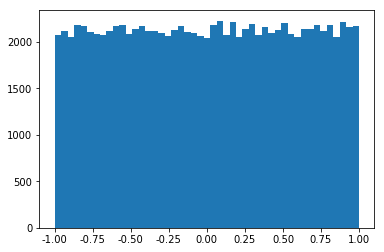

In [127]:
plt.hist(a_random, bins='auto')
plt.show()

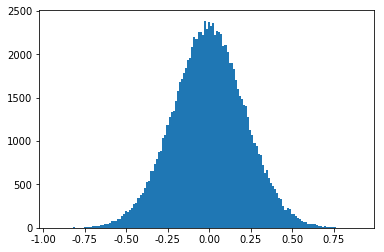

In [128]:
plt.hist(a_svm, bins='auto')
plt.show()